In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("/home/marwane/mlops-projects/first-end-to-end-mlops-project/data/playground-series-s3e8/train.csv")


### Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Gemstone Price Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

### Files

    train.csv - the training dataset; price is the target
    test.csv - the test dataset; your objective is to predict price
    sample_submission.csv - a sample submission file in the correct format

### Columns:

There are 10 independant variables (including id)

* id: unique identifier of each diamond

* carat: Carat(ct) refers to the unique of weight  exclusively to weigh gemstones and Diamonds

* cut: Quality of Diamond Cut

* Color: Color od Diamond

* clarity: Diamond clarity is a mesure .. clarity of the stone, graded by the visibility of these chrateristics under 10-power magnification.

* depth: The depth of Diamond is its heights (in millimeter) from the culet(bottom tip) to the table (flat, top surface)

* table: A Diamond's table is the facet which can be seen when the stone is viewed face up.

* x: Diamond X dimension

* y: Diamond Y dimension

* z: Diamond Z dimension

### Target:
price: Price of the given Diamond

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [5]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [6]:
df.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
86466,86466,0.32,Very Good,J,SI1,63.4,58.0,4.34,4.37,2.76,374
11599,11599,0.47,Good,F,VVS2,63.3,57.0,4.88,4.91,3.09,1263
167666,167666,0.40,Ideal,D,VS2,61.3,55.0,4.73,4.76,2.91,982
138508,138508,0.56,Ideal,D,SI1,61.7,56.0,5.27,5.32,3.26,1722
938,938,1.02,Ideal,G,SI2,60.1,57.0,6.56,6.53,3.91,3604
13496,13496,0.71,Premium,H,SI2,62.0,60.0,5.71,5.67,3.53,2024
54161,54161,0.50,Ideal,G,VS1,61.4,57.0,5.11,5.13,3.15,1656
25304,25304,0.90,Ideal,G,SI1,60.6,57.0,6.19,6.23,3.76,3838
170344,170344,0.70,Premium,F,VS2,60.4,60.0,5.71,5.74,3.45,2649
114396,114396,1.52,Ideal,G,VS2,61.3,57.0,7.38,7.40,4.52,13292


In [7]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.shape

(193573, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [10]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [11]:
df.drop(["id"], axis=1, inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# categorical features
cat_columns = df.columns[df.dtypes=="object"]

In [14]:
# numerical features
num_columns = df.columns[df.dtypes!="object"]

In [15]:
df[num_columns].info

<bound method DataFrame.info of         carat  depth  table     x     y     z  price
0        1.52   62.2   58.0  7.27  7.33  4.55  13619
1        2.03   62.0   58.0  8.06  8.12  5.05  13387
2        0.70   61.2   57.0  5.69  5.73  3.50   2772
3        0.32   61.6   56.0  4.38  4.41  2.71    666
4        1.70   62.6   59.0  7.65  7.61  4.77  14453
...       ...    ...    ...   ...   ...   ...    ...
193568   0.31   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34   62.9   55.0  4.45  4.49  2.81    681
193572   0.71   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 7 columns]>

In [16]:
df[cat_columns]#.info

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [17]:
for col in cat_columns:
    print(df[col].value_counts())
    print(f"Numbers of categories: {len(df[col].value_counts())}")
    print("=========================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
Numbers of categories: 5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
Numbers of categories: 7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
Numbers of categories: 8


In [18]:
df[num_columns].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


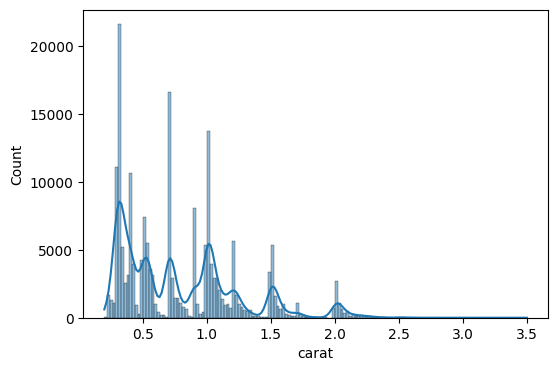

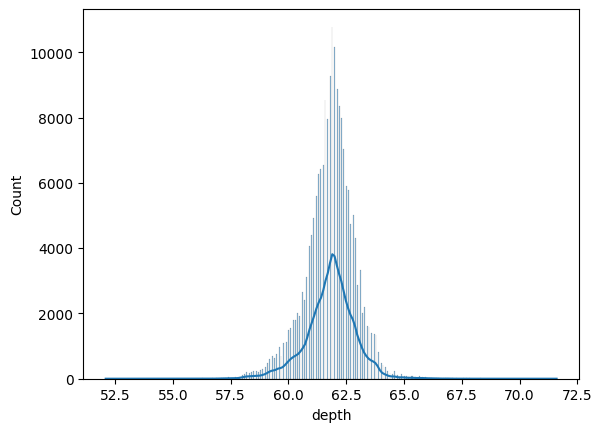

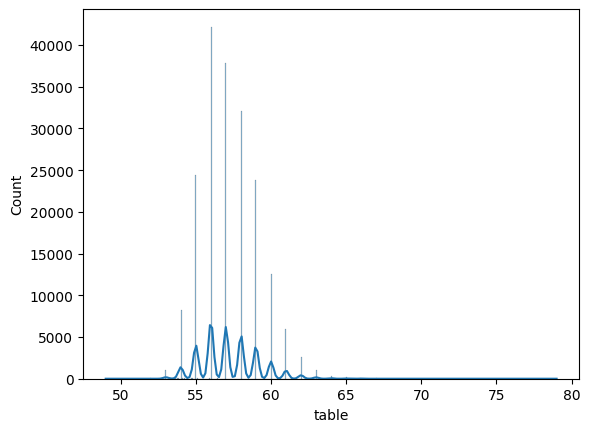

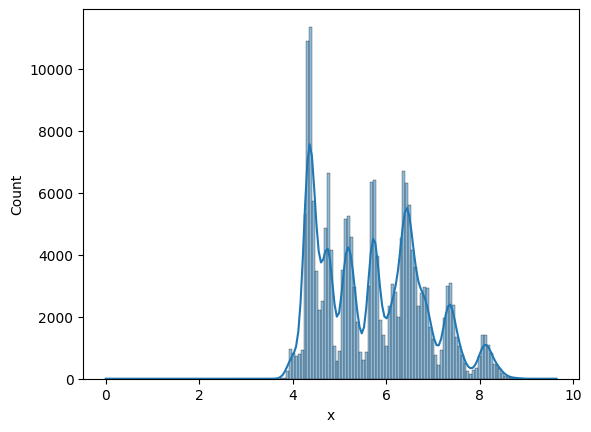

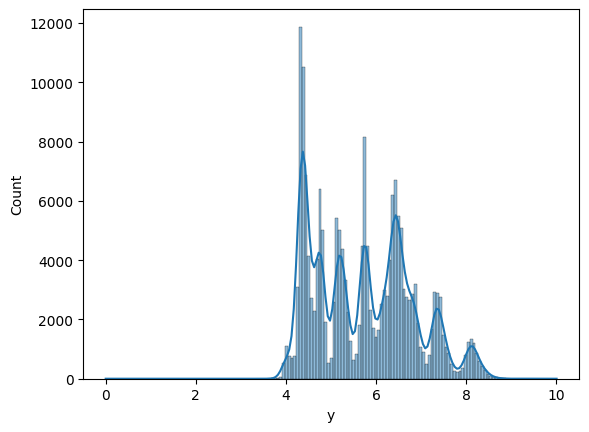

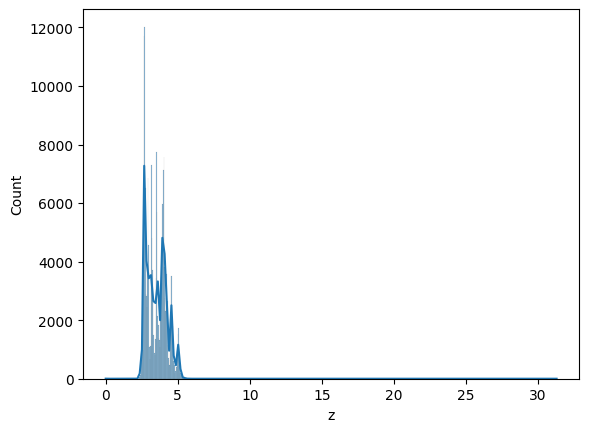

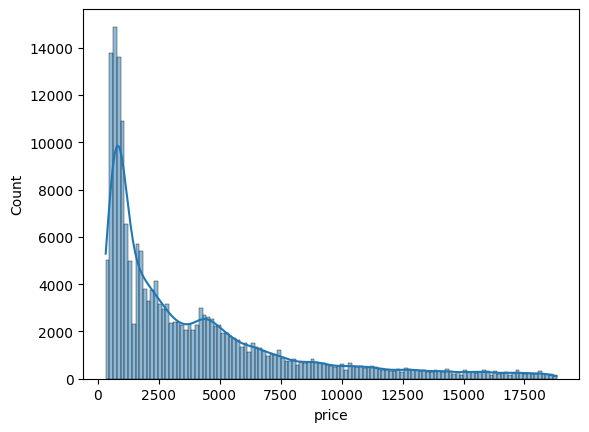

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=df, x=col, kde=True)
    print("\n")
    plt.show()

<Axes: >

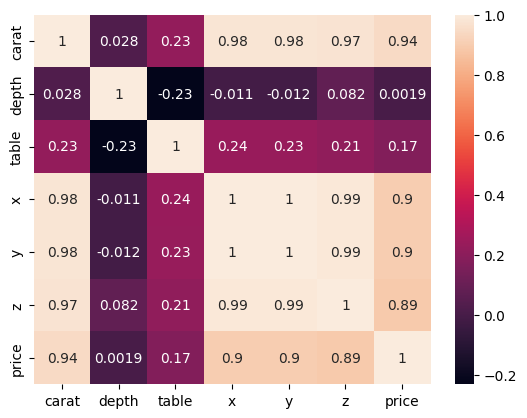

In [20]:
# Correlation 
sns.heatmap(df[num_columns].corr(), annot=True)

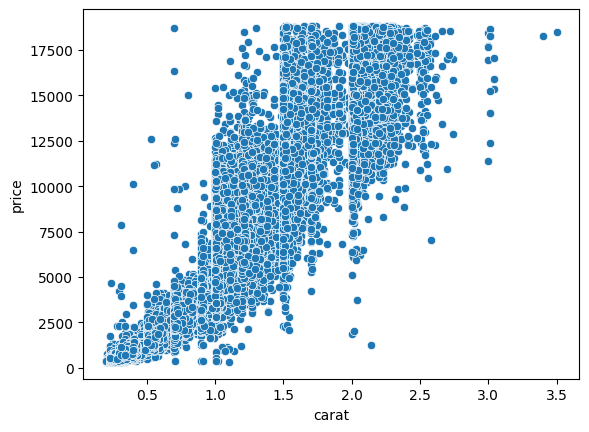

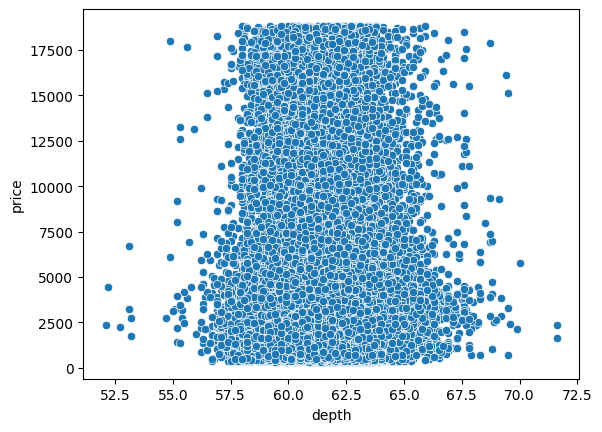

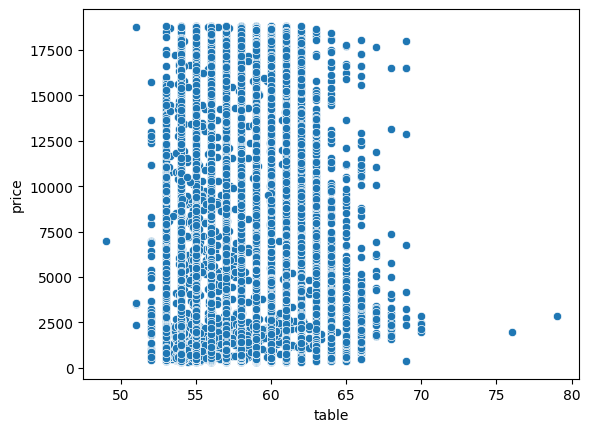

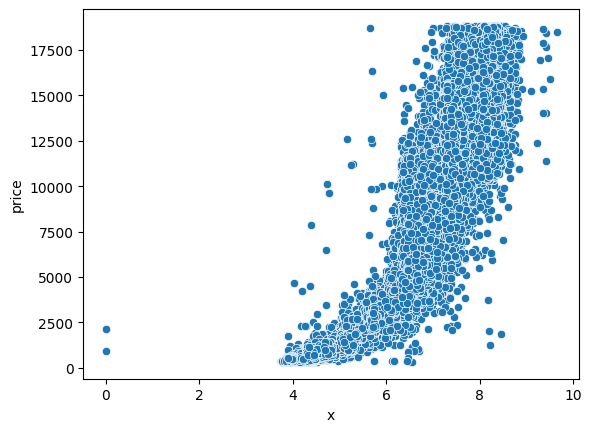

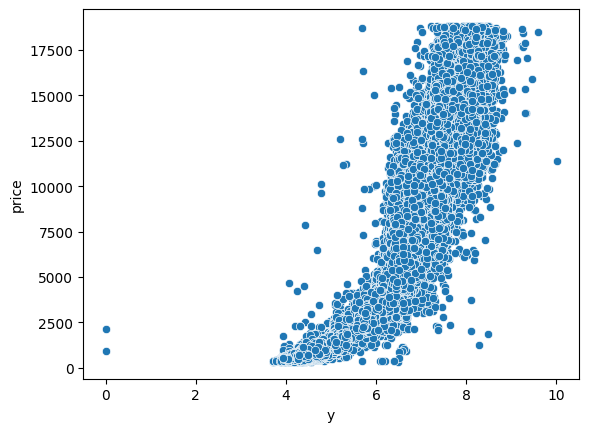

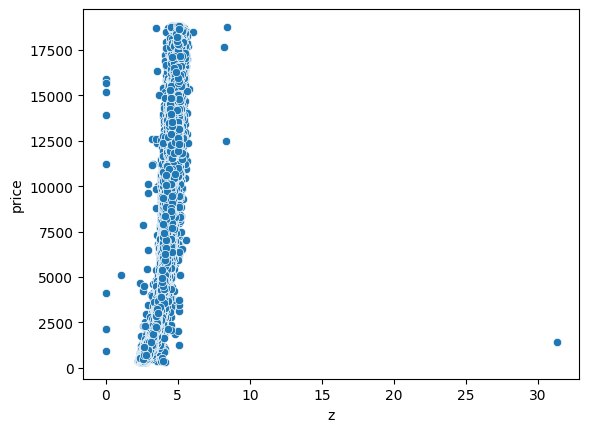

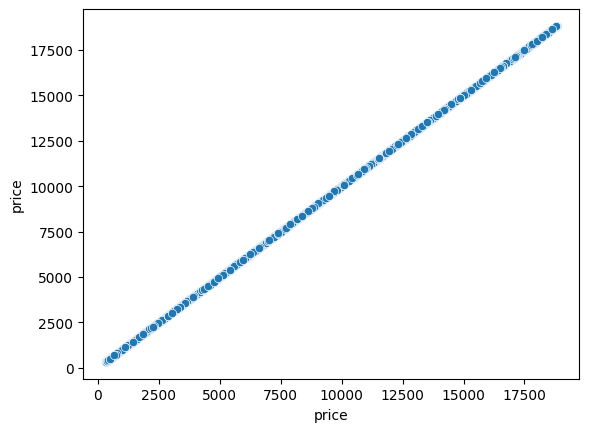

In [21]:

for col in num_columns:
    sns.scatterplot(data=df, x=col, y="price",)
    print("\n")
    plt.show()

## Features Engineering

In [22]:
# Ordinal encoding based on data description 
cut_map =  {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity_map = { "I1": 1, "SI1": 2, "SI2": 3, "VS2": 4, "VS1": 5, "VVS1": 6, "VVS2": 7, "IF": 8}
color_map = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7} 

In [23]:
#
df["cut"] = df["cut"].map(cut_map)
df["clarity"] = df["clarity"].map(clarity_map)
df["color"] = df["color"].map(color_map)

In [24]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,7,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,7,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,2,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,2,62.9,55.0,4.45,4.49,2.81,681


In [25]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
df = pd.read_csv("/home/marwane/mlops-projects/first-end-to-end-mlops-project/data/playground-series-s3e8/train.csv")

X = df.drop(labels=["id", "price"], axis=1)
y = df["price"]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [ ]:
X.select_dtypes(include="object").head()

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2


In [28]:
X["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [29]:
num_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler())
    ]  
)

In [30]:
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_categories = ["D", "E", "F", "G", "H", "I", "J"]
clarity_categories =  ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

In [31]:
cat_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])),
        #("scaler", StandardScaler())
    ]
)

In [32]:
num_cols, cat_cols

(Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

In [33]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, num_cols),
        ("cat_pipeline", cat_pipeline, cat_cols)
    ]
)

## Build model

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [35]:
preprocessor.fit_transform(X_train)

array([[-1.01639515, -0.20431653,  0.4026079 , ...,  3.        ,
         1.        ,  2.        ],
       [ 0.88239567,  0.72075808, -0.1185356 , ...,  3.        ,
         2.        ,  3.        ],
       [ 1.52971072,  0.35072823, -1.16082259, ...,  4.        ,
         5.        ,  3.        ],
       ...,
       [ 0.92555001,  0.905773  ,  0.4026079 , ...,  3.        ,
         3.        ,  3.        ],
       [-1.03797232, -0.66685384, -0.63967909, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03797232, -0.01930161,  0.9237514 , ...,  2.        ,
         3.        ,  1.        ]])

In [36]:
preprocessor.transform(X_test)

array([[-0.62800612,  0.25822077, -0.1185356 , ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60856914, -2.14697321, -0.1185356 , ...,  2.        ,
         3.        ,  1.        ],
       [-1.124281  , -1.2218986 ,  0.9237514 , ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [ 0.23508062,  0.53574316,  3.00832538, ...,  2.        ,
         2.        ,  2.        ],
       [-0.62800612,  0.16571331,  1.44489489, ...,  2.        ,
         2.        ,  2.        ],
       [-0.52012028, -1.49942098, -0.1185356 , ...,  2.        ,
         4.        ,  2.        ]])

In [37]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [38]:
x_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [39]:
x_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-1.016395,-0.204317,0.402608,-1.202472,-1.187395,-1.194148,3.0,1.0,2.0
1,0.882396,0.720758,-0.118536,0.985177,0.941823,1.036109,3.0,2.0,3.0
2,1.529711,0.350728,-1.160823,1.426308,1.394848,1.441611,4.0,5.0,3.0
3,1.896523,0.073206,0.923751,1.741402,1.711965,1.702290,3.0,5.0,1.0
4,0.450852,1.738340,1.444895,0.562052,0.525040,0.703019,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
154853,-0.628006,-1.499421,1.966038,-0.545277,-0.516918,-0.643825,2.0,1.0,2.0
154854,2.414375,0.443236,2.487182,1.921455,1.875054,1.934005,2.0,2.0,2.0
154855,0.925550,0.905773,0.402608,0.994180,0.923702,1.050591,3.0,3.0,3.0
154856,-1.037972,-0.666854,-0.639679,-1.211475,-1.196455,-1.252077,2.0,3.0,6.0


In [40]:
x_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.628006,0.258221,-0.118536,-0.599293,-0.580341,-0.571414,4.0,0.0,2.0
1,2.608569,-2.146973,-0.118536,2.128516,2.201232,1.962969,2.0,3.0,1.0
2,-1.124281,-1.221899,0.923751,-1.373523,-1.413907,-1.469310,3.0,1.0,6.0
3,-1.016395,-0.574346,0.923751,-1.157458,-1.160213,-1.194148,3.0,5.0,6.0
4,0.860819,0.628251,-0.639679,0.949167,0.987125,1.007145,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
38710,0.472429,1.553325,0.923751,0.607065,0.543161,0.731983,1.0,5.0,2.0
38711,-1.037972,-0.481839,-1.160823,-1.157458,-1.142092,-1.179666,4.0,0.0,3.0
38712,0.235081,0.535743,3.008325,0.336985,0.371011,0.398893,2.0,2.0,2.0
38713,-0.628006,0.165713,1.444895,-0.536274,-0.580341,-0.542449,2.0,2.0,2.0


In [41]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [42]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

In [43]:
trained_model_list = []
model_list = []
r2_list = []

In [44]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'XGBoost']

In [45]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [46]:
#models.keys()

In [47]:
#models.values()

In [48]:
def evaluation_model(true, pred):
    MAE = mean_absolute_error(true, pred)
    MSE = mean_squared_error(true, pred)
    R2_SCORE = r2_score(true, pred)
    return MAE, MSE, R2_SCORE

In [49]:
# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Metrics for evaluation
    MAE, MSE, R2_SCORE = evaluation_model(y_test, y_pred)
    print(f"Model '{list(models.keys())[i]}' training performance")
    print(f"MSE: {MSE}")
    print(f"MAE: {MAE}")
    print(f"R2 SCORE: {R2_SCORE}")

    # save r2score
    r2_list.append(R2_SCORE)
    print("="*40)
    print("\n")

Model 'LinearRegression' training performance
MSE: 1013245.5452810968
MAE: 671.5856392794327
R2 SCORE: 0.9372975155452951


Model 'Lasso' training performance
MSE: 1013790.3860145373
MAE: 672.9964160404005
R2 SCORE: 0.9372637992681518


Model 'Ridge' training performance
MSE: 1013256.1246827922
MAE: 671.6145636351026
R2 SCORE: 0.9372968608621598


Model 'ElasticNet' training performance
MSE: 2298790.237391505
MAE: 1053.4176488002738
R2 SCORE: 0.8577443939467991


Model 'RandomForest' training performance
MSE: 366915.42639482324
MAE: 308.68923346919127
R2 SCORE: 0.9772942413348283


Model 'XGBoost' training performance
MSE: 342736.69132723036
MAE: 296.9581576596023
R2 SCORE: 0.9787904894720847




In [50]:
r2_list

[0.9372975155452951,
 0.9372637992681518,
 0.9372968608621598,
 0.8577443939467991,
 0.9772942413348283,
 0.9787904894720847]

In [60]:
import logging
import os
from datetime import datetime


LOG_FILE = f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

log_path = os.path.join(os.getcwd(), "logs")
os.makedirs(log_path, exist_ok=True)

LOG_FILE_PATH = os.path.join(log_path, LOG_FILE)

logging.basicConfig(
                level=logging.INFO,
                filename=LOG_FILE_PATH,
                format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s"
            )

if __name__ == "__main__":
    logging.info("Here again I am testing")